In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [10]:
data = pd.read_excel('/Users/heyminhminh/Downloads/Data_Set.xlsx')
data.head()

,id,addr_state,annual_inc,emp_length,emp_title,home_ownership,installment,loan_amnt,purpose,term,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,802173.0,CA,72000.0,3 years,CA. Dept. Of Corrections,MORTGAGE,395.66,12000,debt_consolidation,36 months,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14518910.0,TX,97500.0,1 year,Curriculum & Implementation Manager,RENT,966.47,35000,debt_consolidation,60 months,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54333324.0,NY,120000.0,1 year,Senior manager,RENT,806.57,25000,credit_card,36 months,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,62247022.0,CA,130000.0,10+ years,Border Patrol Agent,RENT,846.17,25225,debt_consolidation,36 months,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,71986114.0,TX,58296.0,10+ years,Account Manager,MORTGAGE,41.79,1200,other,36 months,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


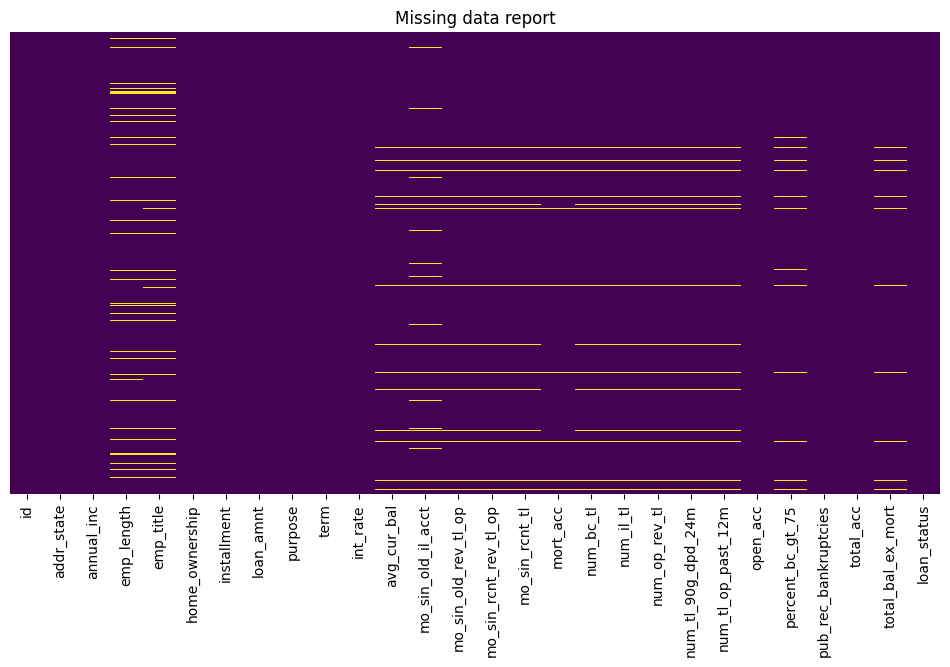

In [13]:
#use seabonn visual the missing data 
#We notice that there are some variables with many missing values (e.g. inq_last_12m, max_bal_12m)
fig, ax1 = plt.subplots(figsize=(12,6))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis').set(title='Missing data report')
plt.show()

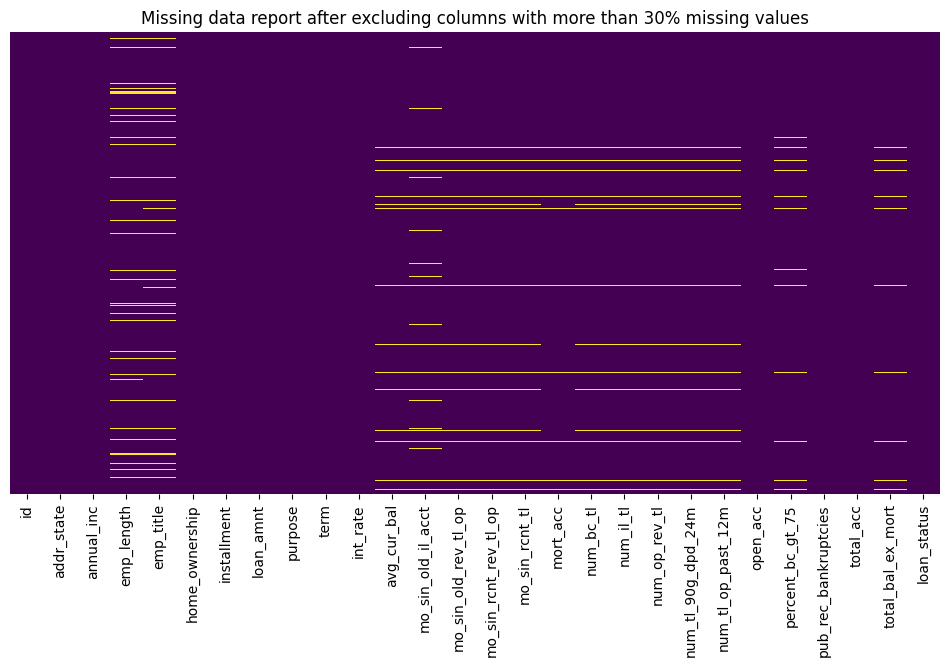

In [14]:
# With min_count we calculate the number of missing records that is acceptable (30%) and with dropna() 
# we then drop those columns. The resulting datatset has 4 columns less as a result of this process. 
perc = 20.0
min_count =  int(((100-perc)/100)*data.shape[0] + 1)
data=data.dropna(axis= 'columns',thresh=min_count)
fig, ax1 = plt.subplots(figsize=(12,6))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis').set(title='Missing data report after excluding columns with more than 30% missing values')
plt.show()

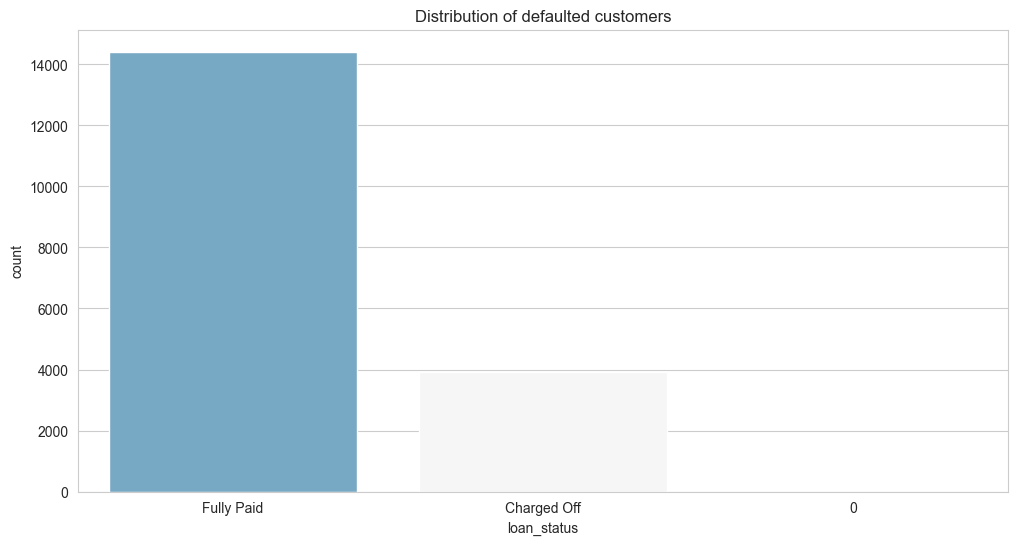

In [15]:
#EDA
sns.set_style('whitegrid')
fig, ax1 = plt.subplots(figsize=(12,6))
sns.countplot(x='loan_status',data=data,palette='RdBu_r').set(title='Distribution of defaulted customers')
plt.show()

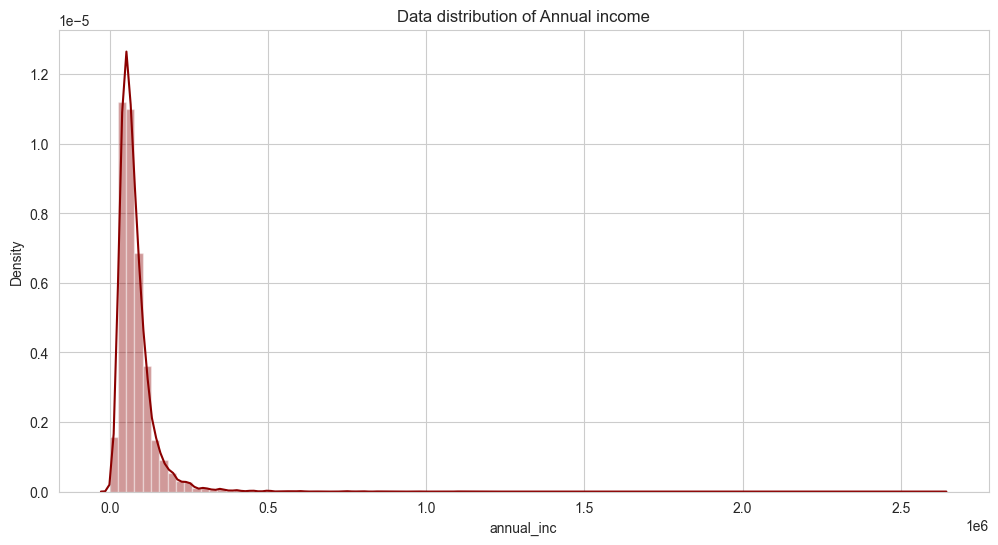

In [16]:
fig, ax1 = plt.subplots(figsize=(12,6))
sns.distplot(data['annual_inc'].dropna(),kde=True,color='darkred',bins=100).set(title='Data distribution of Annual income')
plt.show()

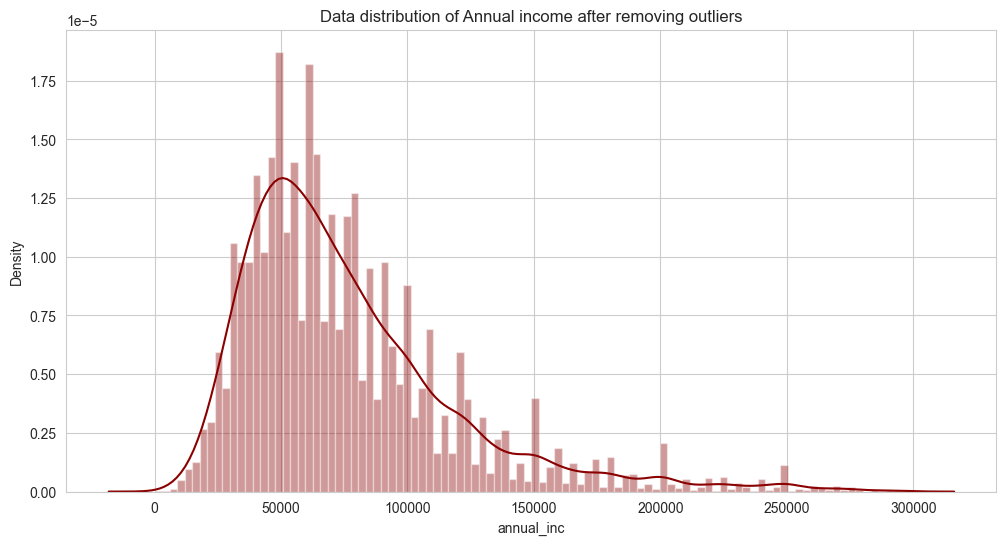

In [17]:
data=data[data['annual_inc']<300000]
fig, ax1 = plt.subplots(figsize=(12,6))
sns.distplot(data['annual_inc'].dropna(),kde=True,color='darkred',bins=100).set(title='Data distribution of Annual income after removing outliers')
plt.show()

In [21]:
#Preparation of the data for the graph:
df_grouped=data.groupby([pd.cut(data["annual_inc"], np.arange(0, 1000.0+100000, 10000)),'loan_status']).size()
df_grouped1=df_grouped.groupby(level=0).apply(lambda x: x/x.sum() * 100).unstack(level='loan_status').reset_index()
df_grouped=df_grouped.groupby(level=0).apply(lambda x: x).unstack(level='loan_status').reset_index()
df_grouped['Total']=df_grouped['Charged Off'] + df_grouped['Fully Paid']

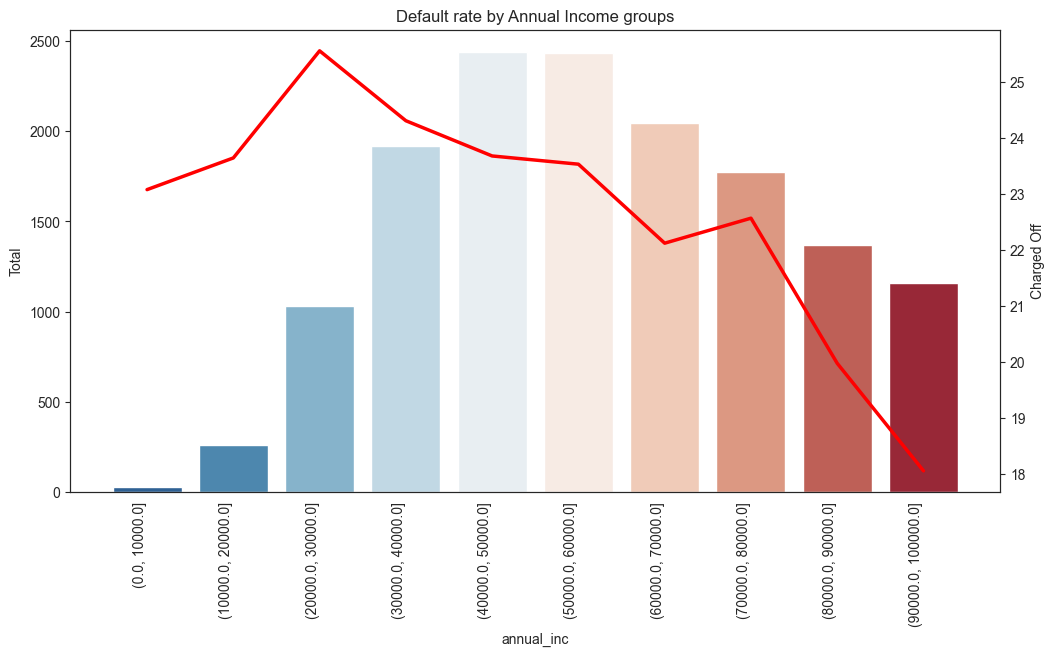

In [22]:
#Graph:
sns.set_style('white')
df_grouped=df_grouped.dropna()
df_grouped1=df_grouped1.dropna()
fig, ax1 = plt.subplots(figsize=(12,6))
sns.barplot(data=df_grouped, x="annual_inc", y="Total", ax=ax1,palette='RdBu_r')
ax2 = ax1.twinx()
sns.lineplot(data=df_grouped1, x=df_grouped1["annual_inc"].astype(str), y="Charged Off",ax=ax2, color='r', linewidth=2.5).set(title='Default rate by Annual Income groups')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [23]:
#Preparation of data for the graph:
df_grouped = data.groupby(['pub_rec_bankruptcies','loan_status']).size()
df_grouped1=df_grouped.groupby(level=0).apply(lambda x: x/x.sum() * 100).unstack(level='loan_status').reset_index()
df_grouped=df_grouped.groupby(level=0).apply(lambda x: x).unstack(level='loan_status').reset_index()
df_grouped['Total']=df_grouped['Charged Off'] + df_grouped['Fully Paid']

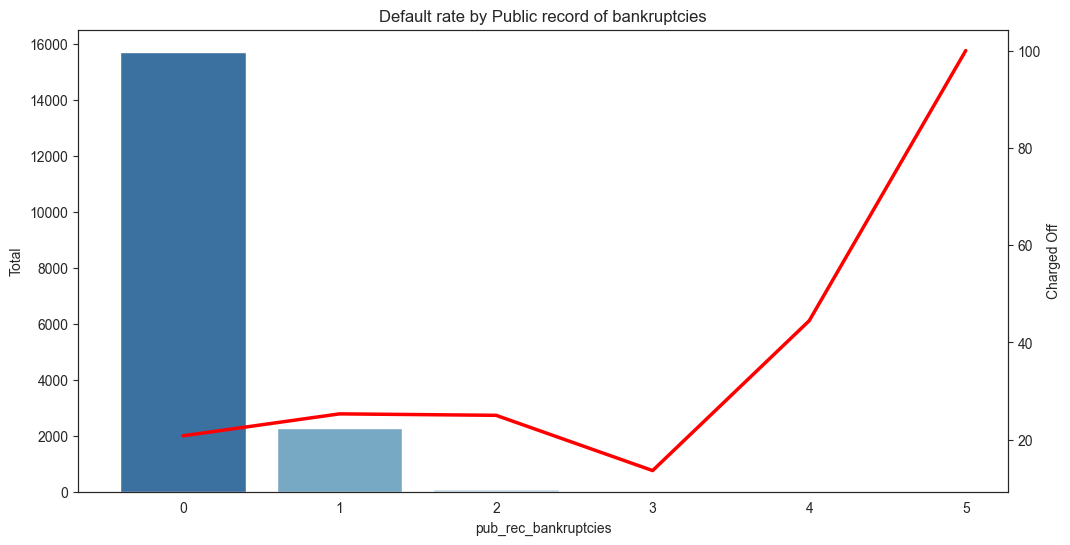

In [24]:
#Graph:
sns.set_style('white')
fig, ax1 = plt.subplots(figsize=(12,6))
sns.barplot(data=df_grouped, x="pub_rec_bankruptcies", y="Total", ax=ax1,palette='RdBu_r')
ax2 = ax1.twinx()
sns.lineplot(data=df_grouped1, x="pub_rec_bankruptcies", y="Charged Off",ax=ax2, color='r', linewidth=2.5).set(title='Default rate by Public record of bankruptcies')
plt.show()